In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf

# Núcleos de convolución no lineales

$$\max \left(\sum_{i=1}^n b_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n y_i b_i k(x_i, x_j) y_j b_j\right)$$

sujeto a las restricciones
$$\sum_{i=1}^n b_i y_i = 0$$
$$0\le b_i\le \frac{1}{2n\gamma}$$

$k$ se denomina el núcleo (**kernel**) de la SVM
- Caso lineal $k(x_i,x_j) = x_i\cdot x_j$
- Caso general $k(x_i, x_j) = \phi(x_i)\cdot \phi(x_j)$

- Kernel Gaussiano: $k(x_i, x_j) = e^{-\gamma||x_i-x_j||^2}$
- Predicción: $k(x_i, p_j) = e^{-\gamma||x_i-p_j||^2}$

- Kernel polinomial homogéneo: $k(x_i, x_j)= (x_i\cdot x_j)^d$
- Kernel polinomial no homogéneo: $(x_i, x_j)= (x_i\cdot x_j +1)^d$
- Kernel de tangente hiperbólica: $(x_i, x_j)= tanh(a x_i\cdot x_j +k)$


In [14]:
(x_vals, y_vals) = datasets.make_circles(n_samples=500, factor=0.5, noise=0.1)

y_vals = np.array([1 if y == 1 else -1 for y in y_vals])

#Valores de los hiperparametros
batch_size = 500
learning_rate=0.002

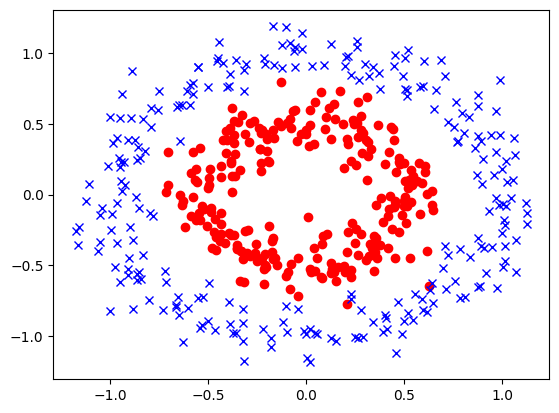

In [15]:
class1_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i]==1]
class1_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i]==1]

class2_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i]==-1]
class2_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i]==-1]

plt.plot(class1_x, class1_y, 'ro', label = "Clase 1")
plt.plot(class2_x, class2_y, 'bx', label = "Clase 2")
plt.show()

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

# Crear los datos
(x_vals, y_vals) = datasets.make_circles(n_samples=500, factor=0.5, noise=0.1)
y_vals = np.array([1 if y == 1 else -1 for y in y_vals], dtype=np.float32)

class1_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i] == 1]
class1_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i] == 1]

class2_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i] == -1]
class2_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i] == -1]

batch_size = 500

# Convertir los datos a tensores
x_data = tf.convert_to_tensor(x_vals, dtype=tf.float32)
y_target = tf.convert_to_tensor(y_vals.reshape(-1, 1), dtype=tf.float32)

# Variables del modelo
b = tf.Variable(tf.random.normal(shape=[batch_size, 1]), dtype=tf.float32)
gamma = tf.constant(-50.0)

# Kernel de la SVM
def gaussian_kernel(x, y, gamma):
    sq_dist = tf.reduce_sum(tf.square(x), axis=1, keepdims=True) + \
              tf.reduce_sum(tf.square(y), axis=1) - \
              2 * tf.matmul(x, y, transpose_b=True)
    return tf.exp(gamma * tf.abs(sq_dist))

my_kernel = gaussian_kernel(x_data, x_data, gamma)

# Definir la función de pérdida
def loss_fn(b, x_data, y_target, my_kernel):
    first_sum = tf.reduce_sum(b)
    b_vect_cross = tf.matmul(b, tf.transpose(b))
    y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
    second_sum = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vect_cross, y_target_cross)))
    return -tf.subtract(first_sum, second_sum)

# Optimización
optimizer = tf.optimizers.SGD(learning_rate=0.002)

# Entrenamiento
loss_vect = []
batch_acc = []

for i in range(100):
    with tf.GradientTape() as tape:
        loss = loss_fn(b, x_data, y_target, my_kernel)
    gradients = tape.gradient(loss, [b])
    optimizer.apply_gradients(zip(gradients, [b]))

    loss_vect.append(loss.numpy())

    # Precisión
    pred_sq_dist = gaussian_kernel(x_data, x_data, gamma)
    prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b), pred_sq_dist)
    prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))
    batch_acc.append(accuracy.numpy())

    if (i + 1) % 50 == 0:
        print(f"Paso #{i + 1}, Pérdida = {loss.numpy()}, Precisión = {accuracy.numpy()}")





Paso #50, Pérdida = 110.37885284423828, Precisión = 0.5519919991493225
Paso #100, Pérdida = 49.442291259765625, Precisión = 0.5474240183830261


In [44]:
# Visualización
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
xx = np.array(xx, dtype = "float32") 
yy = np.array(yy, dtype = "float32") 
grid_points = np.c_[xx.ravel(), yy.ravel()]

pred_sq_dist = gaussian_kernel(xx, yy, gamma)

grid_predictions = tf.reshape(pred_sq_dist, xx.shape).numpy()

InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 2116 values, but the requested shape has 2070 [Op:Reshape]

In [45]:
pred_sq_dist.shape

TensorShape([46, 46])

In [36]:
grid_predictions = tf.reshape(grid_predictions, xx.shape).numpy()

InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 1035000 values, but the requested shape has 2070 [Op:Reshape]

In [28]:
xx.shape
grid_predictions.shape

TensorShape([500, 50167])

In [22]:
# Obtener las predicciones para la cuadrícula de puntos
grid_predictions = []
batch_size = 1000  # Tamaño del lote para la predicción en la cuadrícula

for i in range(0, len(grid_points), batch_size):
    batch_grid_points = grid_points[i:i + batch_size]
    pred_sq_dist = gaussian_kernel(x_data, tf.linalg.matrix_transpose(tf.convert_to_tensor(batch_grid_points, dtype=tf.float32)), gamma)
    prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b), pred_sq_dist)
    batch_predictions = tf.sign(prediction_output - tf.reduce_mean(prediction_output))
    grid_predictions.append(batch_predictions)

# Aplanar y concatenar las predicciones
grid_predictions = tf.concat(grid_predictions, axis=1)
grid_predictions = tf.squeeze(grid_predictions).numpy()

# Ahora reformamos grid_predictions al tamaño de la cuadrícula
grid_predictions = grid_predictions.reshape(xx.shape)


InvalidArgumentError: {{function_node __wrapped____MklMatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [500,2], In[1]: [2,1000] [Op:MatMul] name: 

In [ ]:
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.7)
plt.plot(class1_x, class1_y, 'ro', label="Clase 1")
plt.plot(class2_x, class2_y, 'bx', label="Clase 2")
plt.legend(loc="lower right")
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()




In [ ]:
plt.plot(batch_acc, 'k-', label="Precisión")
plt.title("Precisión en la clasificación")
plt.xlabel("Número de Iteración")
plt.ylabel("Precisión")
plt.legend(loc="lower right")
plt.show()



In [ ]:
plt.plot(loss_vect, 'k-')
plt.title("Pérdidas por Iteración")
plt.show()